# Fianl-Term Project – 선형회귀 설계/구현

- 자동차 연비에 영향을 미치는 두 가지 요소인 마력과 총중량이 아래 표와 같다.

|특성/차종|A|B|C||D|E|F||G|
|---|---|---|---||------|---|---||-----|
|마력|130|250|190||300|210|220||170|
|총중량(kg)|1900|2600|2200||2900|2400|2300||2100|
|연비|16.3|10.2|11.1||7.1|12.1|13.1||14.2|

#### 위 표를 보고 아래 내용을 구현하시오
- 해당 자료를 바탕으로 적절한 선형회귀 모델을 구현
- 계수와 절편 그리고 예측모델의 성능점수(Accuracy)를 출력
- 270마력, 2500Kg 자동차의 예상연비 출력
- 2개의 피쳐(마력, 무게)와 연비의 상관관계를 나타내는 산점도 그래프 출력

## 1) 데이터 수집

- 아래 표를 엑셀로 표를 만들고 CSV파일로 저장

## 2) 분석에 필요 없는 컬럼을 제거하고 데이터셋의 내용을 확인

In [10]:
import numpy as np
import pandas as pd
data_df = pd.read_csv('C:/Users/Jung Suk Won/Desktop/project.csv', header = 0, engine = 'python')

print('데이터셋 크기: ', data_df.shape)
data_df.head()

데이터셋 크기:  (7, 4)


,car_name,mpg,weight,horsepower
0,A,16.3,1900,130
1,B,10.2,2600,250
2,C,11.1,2200,190
3,D,7.1,2900,300
4,E,12.1,2400,210


- 데이터셋의 형태data_df.shape를 확인해보면, 7행과 4열로 구성되어 있음 7개 데이터에 4개 컬럼이 있으므로 파일 내용이 DataFrame으로 잘 저장되었다는 것을 알 수 있음 데이터 5개를 출력하여 내용을 확인data_df.head( ). 

In [11]:
data_df = data_df.drop(['car_name'], axis = 1, inplace = False)
print('데이터셋 크기: ', data_df.shape)
data_df.head()

데이터셋 크기:  (7, 3)


,mpg,weight,horsepower
0,16.3,1900,130
1,10.2,2600,250
2,11.1,2200,190
3,7.1,2900,300
4,12.1,2400,210


- 피처 중에서 ‘car_name’는 분석에 사용하지 않으므로 제거data_ df.drop( ) 후 확인data_df.head( ).

In [12]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mpg         7 non-null      float64
 1   weight      7 non-null      int64  
 2   horsepower  7 non-null      int64  
dtypes: float64(1), int64(2)
memory usage: 296.0 bytes


- 분석에 사용할 데이터셋의 정보data_df.info( )를 확인

## 3) 자동차 연비 예측을 위해 다음과 같이 선형 회귀 분석 모델을 구축

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

Y = data_df['mpg']
X = data_df.drop(['mpg'], axis = 1, inplace = False)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_predict = lr.predict(X_test)

- 사이킷런을 사용하여 머신러닝 선형 회귀 분석을 하기 위한 LinearRegression과 데이터셋 분리 작업을 위한 train_test_split, 성능 측정을 위한 평가 지표인 mean_squared_ error, r2_score를 임포트, 
- 자동차 연비를 예측하는 것이 프로젝트의 목표이므로, mpg 피처를 회귀식의 종속 변수 Y로 설정하고, mpg를 제외한 나머지 피처를 독립 변수 X로 설정
- 데이터를 7:3 비율 test_size=0.3로 분할하여 train_test_split( ) 학습 데이터와 평가 데이터로 설정
- 선형 회귀 분석 모델 객체인 lr을 생성
- 학습 데이터 X_train와 Y_train를 가지고 학습을 수행fit( )
- 평가 데이터 X_test로 예측을 수행하여predict( ) 예측값 Y_predict를 구함

In [14]:
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R^2(Variance score) : {0:.3f}'.format(r2_score(Y_test, Y_predict)))

MSE : 2.640, RMSE : 1.625
R^2(Variance score) : 0.101


- 회귀 분석은 지도 학습이므로 평가 데이터 X에 대한 YY_test를 이미 알고 있음 평가 데이터의 결과값 Y_test과 예측 결과값 Y_predict의 오차를 계산하여 모델을 평가하는데, mean_ squared_error()를 이용하여 평가 지표 MSE를 구하고 구한 값의 제곱근을 계산하여 평가 지표 RMSE를 구한다. 그리고 r2_score()를 이용하여 평가 지표 R2를 구함

In [15]:
print('Y 절편 값: ', np.round(lr.intercept_, 2))
print('회귀 계수 값: ', np.round(lr.coef_, 2))

Y 절편 값:  36.9
회귀 계수 값:  [-0.01  0.02]


- 선형 회귀의 Y절편 lr.intercept_과 각 피처의 회귀 계수lr.coef_를 확인

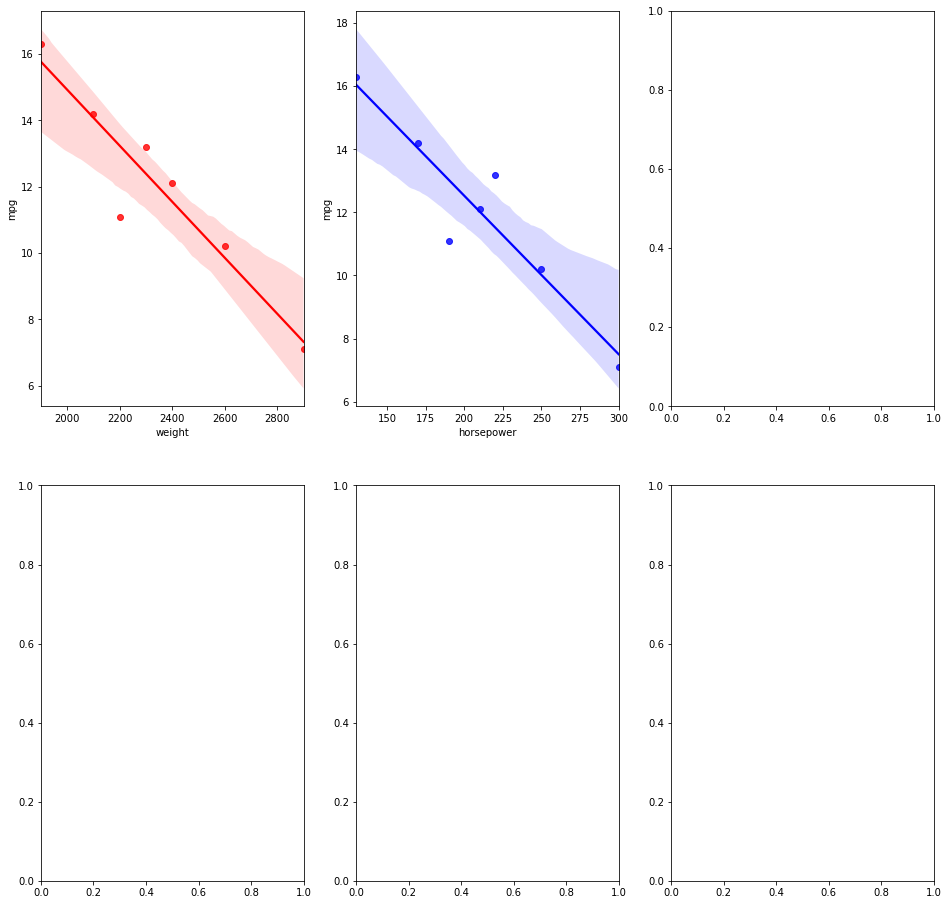

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(figsize = (16, 16), ncols = 3, nrows = 2)
x_features = ['weight', 'horsepower']
plot_color = ['r', 'b']
for i, feature in enumerate(x_features):
    row = int(i/3)
    col = i%3
    sns.regplot(x = feature, y = 'mpg', data = data_df, ax = axs[row][col], color = plot_color[i])

- 시각화에 필요한 모듈을 임포트 subplots()를 사용하여 독립 변수인 5개 피처  ['weight', 'horsepower']와 종속 변수인 연비 mpg와의 회귀 관계를 보여주는 2개 그래프를  나타낸다.

## 완성된 자동차 연비 예측 모델을 사용하여 임의의 데이터를 입력하면 연비를 예측할 수 있음

In [16]:
print("연비를 예측하고 싶은 차의 정보를 입력해주세요.")
horsepower_1 = int(input("마력 : "))
weight_1 = int(input("중량 : "))

mpg_predict = lr.predict([[weight_1,horsepower_1]])
print("이 자동차의 예상 연비(MPG)는 %.2f입니다." %mpg_predict)

연비를 예측하고 싶은 차의 정보를 입력해주세요.
마력 : 270
중량 : 2500
이 자동차의 예상 연비(MPG)는 11.53입니다.


- 5개 항목(독립 변수)을 입력하면 변수에 저장 변수를 회귀 모델에 적용하여 예측 결과값을 구함